# **Library Import**

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession

# **Dataset Import**

In [48]:
df=pd.read_csv('weatherHistory.csv')

# **Data Description**

In [49]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [67]:
print(df.dtypes)

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object


# **Data Visualization**

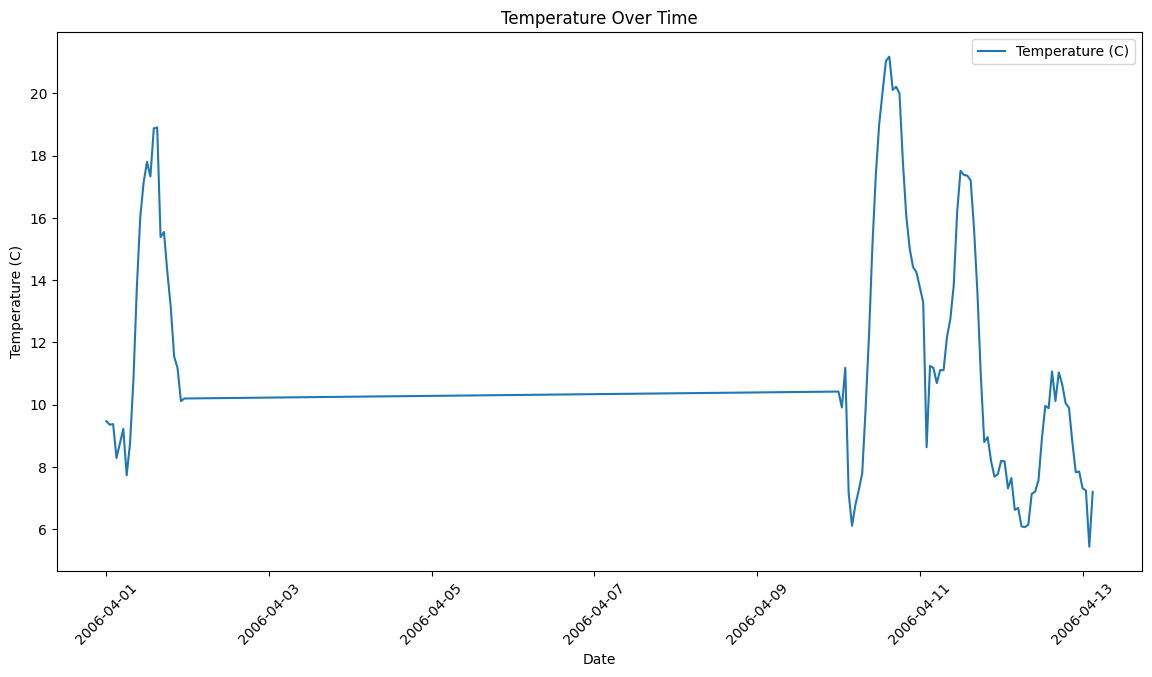

In [50]:
#Plotting of time series
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'])
plt.figure(figsize=(14, 7))
plt.plot(df['Formatted Date'].head(100), df['Temperature (C)'].head(100), label='Temperature (C)')
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.title('Temperature Over Time')
plt.legend()
plt.xticks(rotation=45)  
plt.show()

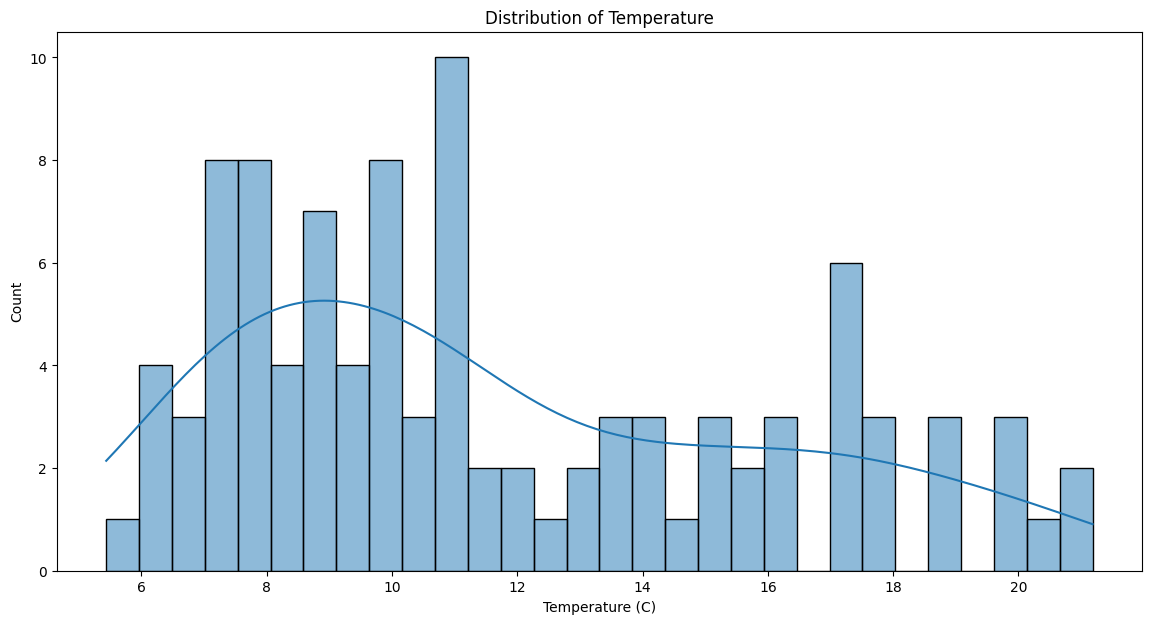

In [51]:
#Histogram temperature
plt.figure(figsize=(14, 7))
sns.histplot(df['Temperature (C)'].head(100), bins=30, kde=True)
plt.xlabel('Temperature (C)')
plt.title('Distribution of Temperature')
plt.show()

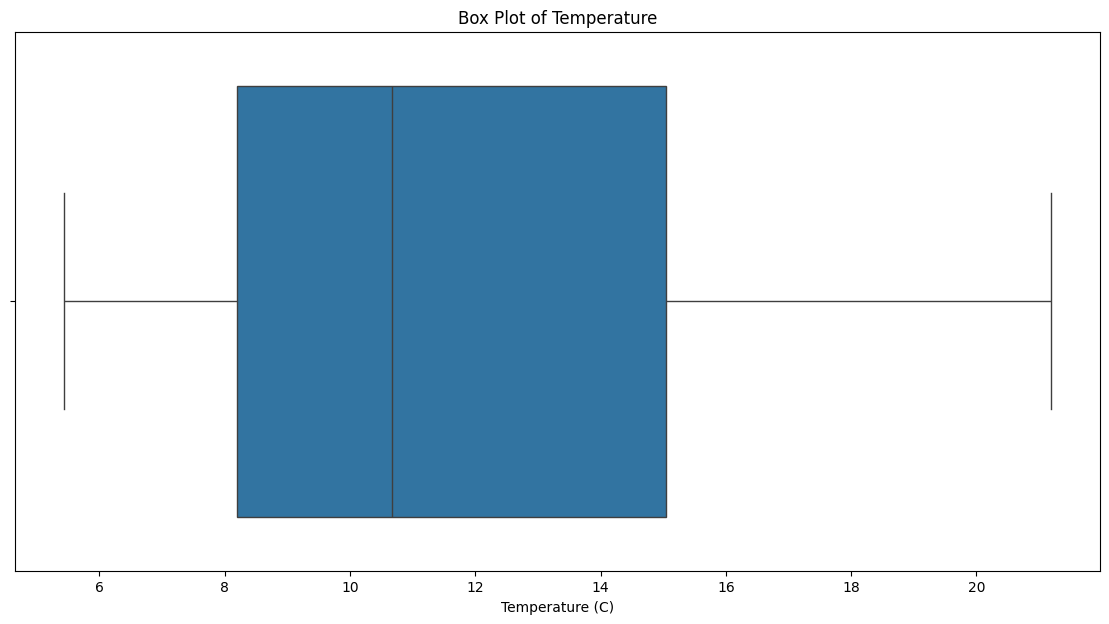

In [52]:
#BoxPlot temperature
plt.figure(figsize=(14, 7))
sns.boxplot(x=df['Temperature (C)'].head(100))
plt.xlabel('Temperature (C)')
plt.title('Box Plot of Temperature')
plt.show()

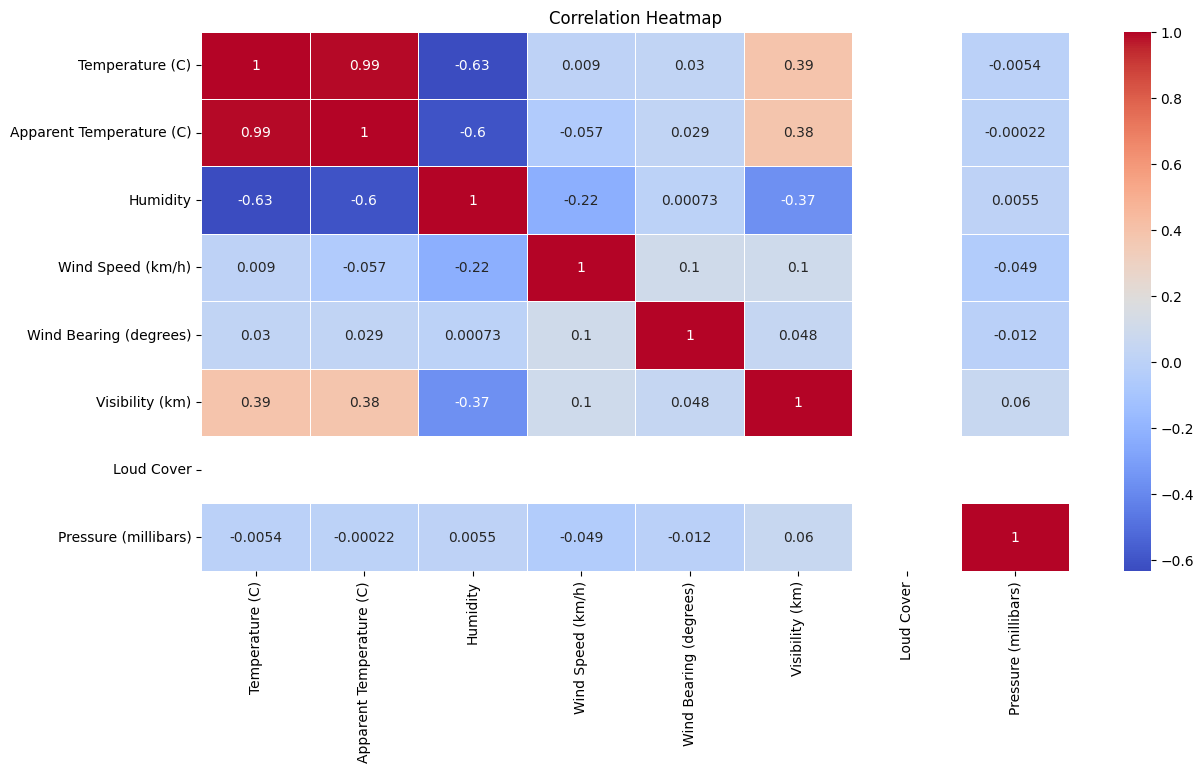

In [53]:
#Heatmap correlation
plt.figure(figsize=(14, 7))
#only selcecting numeric value
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

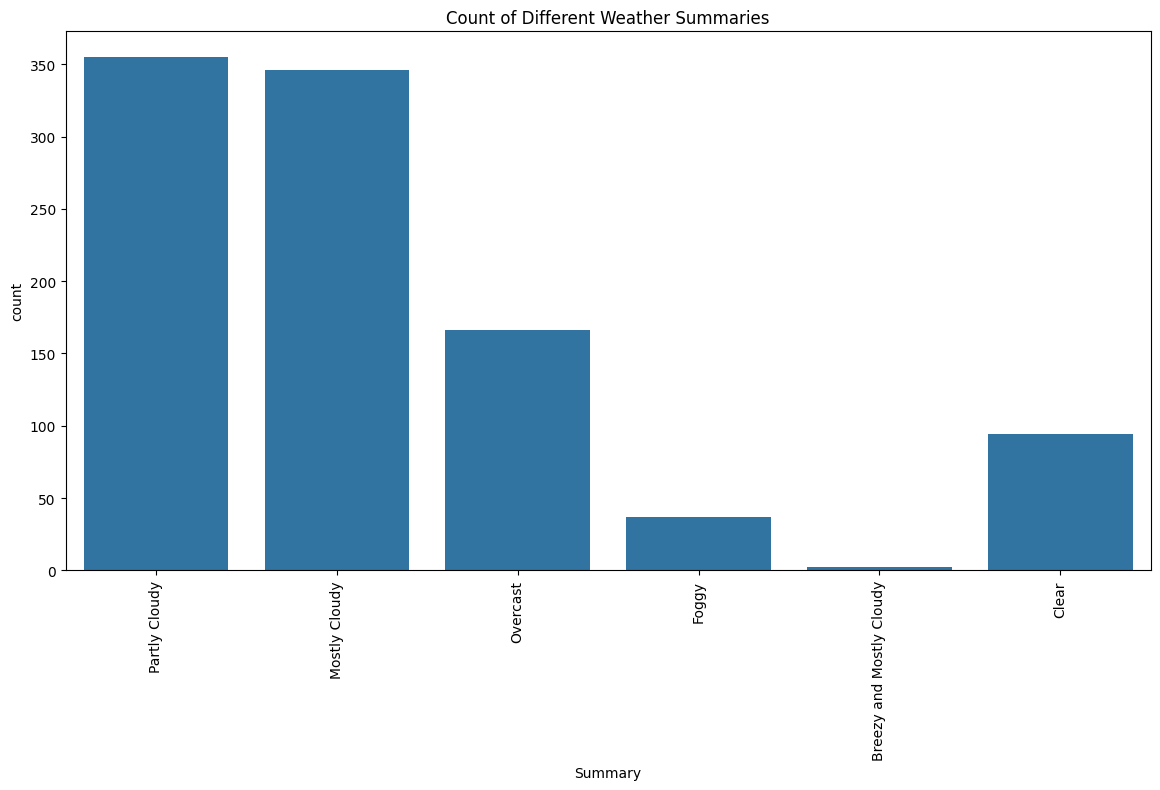

In [54]:
#counting Plot Categorical Data
df_1 = df.head(1000)
plt.figure(figsize=(14, 7))
sns.countplot(data=df_1, x='Summary')
plt.xticks(rotation=90)
plt.xlabel('Summary')
plt.title('Count of Different Weather Summaries')
plt.show()

# **Data Preprocessing**

In [55]:
#Checking null
print(df.isnull().sum())

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64


In [56]:
#Droping null
df.dropna(inplace=True)

# **Big data analysis technology**

In [57]:
!pip install pyspark

In [58]:
from pyspark.sql import SparkSession
#starting spark
spark = SparkSession.builder \
            .appName("Weather Analysis") \
            .getOrCreate()
file_path = 'weatherHistory.csv'
data = spark.read.csv(file_path, header=True, inferSchema=True)
data.printSchema()
data.show(5)

root
 |-- Formatted Date: timestamp (nullable = true)
 |-- Summary: string (nullable = true)
 |-- Precip Type: string (nullable = true)
 |-- Temperature (C): double (nullable = true)
 |-- Apparent Temperature (C): double (nullable = true)
 |-- Humidity: double (nullable = true)
 |-- Wind Speed (km/h): double (nullable = true)
 |-- Wind Bearing (degrees): double (nullable = true)
 |-- Visibility (km): double (nullable = true)
 |-- Loud Cover: double (nullable = true)
 |-- Pressure (millibars): double (nullable = true)
 |-- Daily Summary: string (nullable = true)

+-------------------+-------------+-----------+-----------------+------------------------+--------+------------------+----------------------+------------------+----------+--------------------+--------------------+
|     Formatted Date|      Summary|Precip Type|  Temperature (C)|Apparent Temperature (C)|Humidity| Wind Speed (km/h)|Wind Bearing (degrees)|   Visibility (km)|Loud Cover|Pressure (millibars)|       Daily Summary|
+--

In [59]:
data.select('Formatted Date', 'Temperature (C)').show(5)

+-------------------+-----------------+
|     Formatted Date|  Temperature (C)|
+-------------------+-----------------+
|2006-03-31 22:00:00|9.472222222222221|
|2006-03-31 23:00:00|9.355555555555558|
|2006-04-01 00:00:00|9.377777777777778|
|2006-04-01 01:00:00| 8.28888888888889|
|2006-04-01 02:00:00|8.755555555555553|
+-------------------+-----------------+
only showing top 5 rows



In [60]:
#Filtering
data.filter(data['Temperature (C)'] > 20).show(5)

+-------------------+-------------+-----------+------------------+------------------------+--------+------------------+----------------------+-----------------+----------+--------------------+--------------------+
|     Formatted Date|      Summary|Precip Type|   Temperature (C)|Apparent Temperature (C)|Humidity| Wind Speed (km/h)|Wind Bearing (degrees)|  Visibility (km)|Loud Cover|Pressure (millibars)|       Daily Summary|
+-------------------+-------------+-----------+------------------+------------------------+--------+------------------+----------------------+-----------------+----------+--------------------+--------------------+
|2006-04-10 11:00:00|Mostly Cloudy|       rain| 20.04444444444444|       20.04444444444444|     0.4|           28.3682|                 170.0|9.982000000000001|       0.0|             1012.22|Mostly cloudy thr...|
|2006-04-10 12:00:00|Mostly Cloudy|       rain|21.049999999999997|      21.049999999999997|     0.4|26.903100000000002|                 187.0|  

In [61]:
#Aggregating
data.groupBy('Summary').count().show()

+--------------------+-----+
|             Summary|count|
+--------------------+-----+
|              Breezy|   54|
|Humid and Mostly ...|   40|
|  Windy and Overcast|   45|
|               Foggy| 7148|
|Humid and Partly ...|   17|
|     Windy and Foggy|    4|
|Breezy and Partly...|  386|
|                 Dry|   34|
|             Drizzle|   39|
|      Breezy and Dry|    1|
|       Partly Cloudy|31733|
|               Clear|10890|
|       Windy and Dry|    1|
|       Mostly Cloudy|28094|
|    Breezy and Foggy|   35|
| Breezy and Overcast|  528|
|Dangerously Windy...|    1|
|          Light Rain|   63|
|Breezy and Mostly...|  516|
|Dry and Mostly Cl...|   14|
+--------------------+-----+
only showing top 20 rows



In [62]:
from pyspark.sql import SparkSession
spark = SparkSession.builder \
            .appName("Weather Analysis") \
            .getOrCreate()

file_path = 'weatherHistory.csv'
data = spark.read.csv(file_path, header=True, inferSchema=True)
#Printing schema
data.printSchema()
data.show(5)
#selecting numeric columns values
numeric_cols = ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']
data.select(numeric_cols).describe().show()
spark.stop()

root
 |-- Formatted Date: timestamp (nullable = true)
 |-- Summary: string (nullable = true)
 |-- Precip Type: string (nullable = true)
 |-- Temperature (C): double (nullable = true)
 |-- Apparent Temperature (C): double (nullable = true)
 |-- Humidity: double (nullable = true)
 |-- Wind Speed (km/h): double (nullable = true)
 |-- Wind Bearing (degrees): double (nullable = true)
 |-- Visibility (km): double (nullable = true)
 |-- Loud Cover: double (nullable = true)
 |-- Pressure (millibars): double (nullable = true)
 |-- Daily Summary: string (nullable = true)

+-------------------+-------------+-----------+-----------------+------------------------+--------+------------------+----------------------+------------------+----------+--------------------+--------------------+
|     Formatted Date|      Summary|Precip Type|  Temperature (C)|Apparent Temperature (C)|Humidity| Wind Speed (km/h)|Wind Bearing (degrees)|   Visibility (km)|Loud Cover|Pressure (millibars)|       Daily Summary|
+--

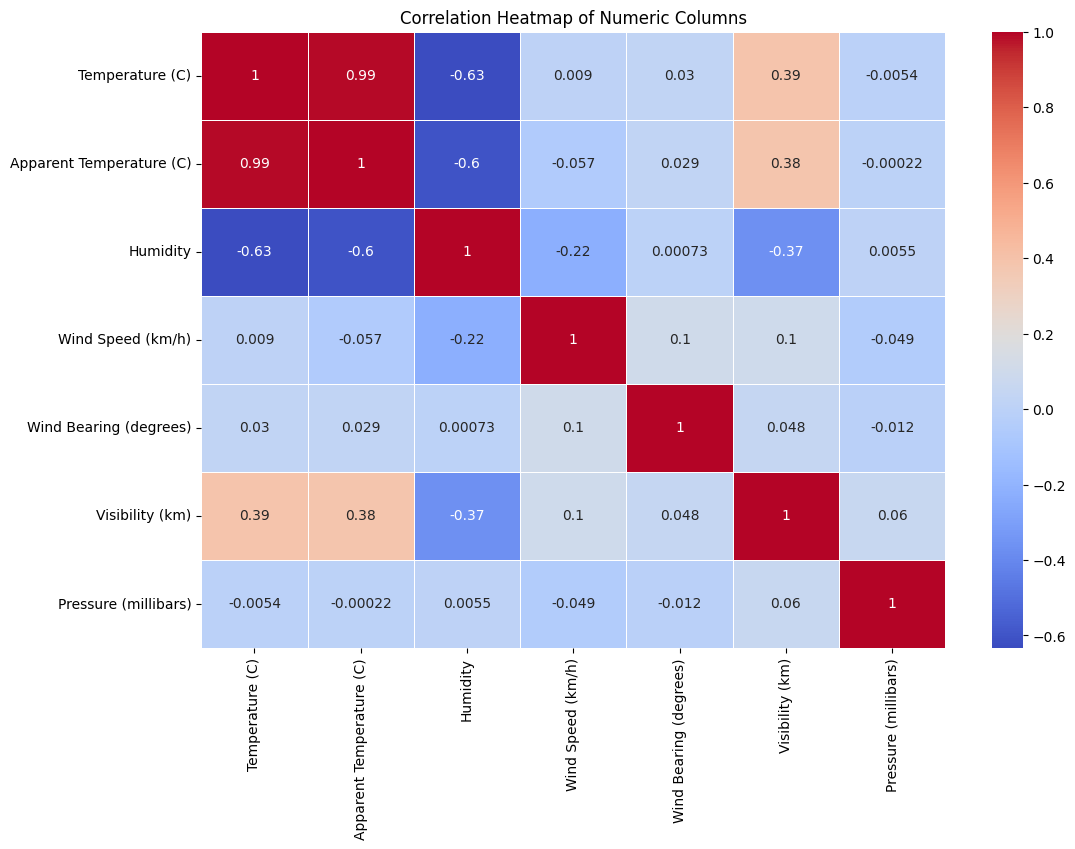

In [63]:
spark = SparkSession.builder \
            .appName("Weather Analysis") \
            .getOrCreate()
file_path = '/content/weatherHistory.csv'
data = spark.read.csv(file_path, header=True, inferSchema=True)
numeric_cols = ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
                'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
                'Pressure (millibars)']
#selecting numeric data values 
numeric_data_pd = data.select(numeric_cols).toPandas()
#calculating correlation matrix
corr_matrix = numeric_data_pd.corr()
#heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

spark.stop()